# 1. Import Library yang dibutuhkan

In [62]:
# Library utama
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# Library untuk Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Library untuk Plot dan Grafik
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Library untuk Algoritma Long Short Term Memory
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM



# 2. Memuat Dataset

In [121]:
# Memuat dataset dari directory /Data

maindf=pd.read_csv('Data/ltc-idr.csv')

In [122]:
maindf.shape

(1551, 8)

In [123]:
maindf.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-03-30,2024-03-31,1.713925e+06,1.713925e+06,1.606076e+06,1.628949e+06,5.143493e+13,1.220619e+14
1,2024-03-29,2024-03-30,1.490574e+06,1.735644e+06,1.478186e+06,1.728329e+06,3.727685e+13,1.184331e+14
2,2024-03-28,2024-03-29,1.485008e+06,1.525646e+06,1.482577e+06,1.492550e+06,2.689695e+13,1.119164e+14
3,2024-03-27,2024-03-28,1.518514e+06,1.547500e+06,1.478538e+06,1.483023e+06,4.066790e+13,1.123879e+14
4,2024-03-26,2024-03-27,1.431998e+06,1.530540e+06,1.392202e+06,1.517368e+06,2.108855e+13,1.079545e+14


In [124]:
maindf.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
1546,2020-01-05,2020-01-06,678891.255747,704350.329563,677431.488233,685497.328400,4.020108e+13,4.373165e+13
1547,2020-01-04,2020-01-05,666885.188990,679260.594780,663074.492937,678932.649550,4.073286e+13,4.281191e+13
1548,2020-01-03,2020-01-04,626658.761214,667699.156435,618295.204688,666216.363741,3.960831e+13,4.152098e+13
1549,2020-01-02,2020-01-03,661568.927048,663787.266116,625232.871668,626000.073345,3.511541e+13,4.134018e+13
1550,2020-01-01,2020-01-02,657457.730571,667904.033134,654646.461819,661601.888036,3.700366e+13,4.223752e+13


In [125]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       1551 non-null   object 
 1   End         1551 non-null   object 
 2   Open        1551 non-null   float64
 3   High        1551 non-null   float64
 4   Low         1551 non-null   float64
 5   Close       1551 non-null   float64
 6   Volume      1551 non-null   float64
 7   Market Cap  1551 non-null   float64
dtypes: float64(6), object(2)
memory usage: 97.1+ KB


In [126]:
maindf.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1.551000e+03,1.551000e+03,1.551000e+03,1.551000e+03,1.551000e+03,1.551000e+03
mean,1.574700e+06,1.628475e+06,1.517205e+06,1.575571e+06,4.743368e+13,1.085675e+14
std,9.057933e+05,9.540321e+05,8.544395e+05,9.060919e+05,7.176882e+13,6.035793e+13
min,4.730592e+05,5.496724e+05,3.956497e+05,4.725673e+05,4.943521e+12,3.343821e+13
25%,9.422793e+05,9.748350e+05,9.119381e+05,9.467435e+05,1.513975e+13,6.406950e+13
50%,1.236886e+06,1.277396e+06,1.204811e+06,1.237434e+06,2.399539e+13,8.811299e+13
75%,2.007018e+06,2.084943e+06,1.943378e+06,2.006067e+06,4.420961e+13,1.370470e+14
max,6.129701e+06,6.509743e+06,5.550499e+06,6.106083e+06,9.214721e+14,4.117775e+14


## Memeriksa Null Value 

In [127]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [128]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [129]:
maindf.shape

(1551, 8)

# 3. EDA(Exploratory Data Analysis)

In [130]:
# Memeriksa kapan tanggal data dimulai dan tanggal data berakhir
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]

print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2024-03-30
Ending Date 2020-01-01


C:\Users\Jafar\AppData\Local\Temp\ipykernel_1808\1940504381.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Jafar\AppData\Local\Temp\ipykernel_1808\1940504381.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



## Melakukan analisis data per-tahun

#### Analisis data tahun 2020

In [131]:
maindf['Start'] = pd.to_datetime(maindf['Start'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Start'] >= '2020-01-01')
                     & (maindf['Start'] < '2021-01-01')]

y_2020.drop(y_2020[['Volume','Market Cap']],axis=1)

,Start,End,Open,High,Low,Close
1185,2020-12-31,2021-01-01,2.059160e+06,2.062171e+06,1.945562e+06,1.977306e+06
1186,2020-12-30,2020-12-31,2.040273e+06,2.100716e+06,1.966802e+06,2.055896e+06
1187,2020-12-29,2020-12-30,2.056819e+06,2.069278e+06,1.924120e+06,2.048210e+06
1188,2020-12-28,2020-12-29,2.019940e+06,2.158305e+06,2.013878e+06,2.062191e+06
1189,2020-12-27,2020-12-28,2.052593e+06,2.190909e+06,1.957239e+06,2.029197e+06
...,...,...,...,...,...,...
1546,2020-01-05,2020-01-06,6.788913e+05,7.043503e+05,6.774315e+05,6.854973e+05
1547,2020-01-04,2020-01-05,6.668852e+05,6.792606e+05,6.630745e+05,6.789326e+05
1548,2020-01-03,2020-01-04,6.266588e+05,6.676992e+05,6.182952e+05,6.662164e+05
1549,2020-01-02,2020-01-03,6.615689e+05,6.637873e+05,6.252329e+05,6.260001e+05


In [132]:
monthvise= y_2020.groupby(y_2020['Start'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Start,,
January,8.299235e+05,8.434992e+05
February,1.155648e+06,1.151858e+06
March,7.092433e+05,6.990057e+05
April,6.762383e+05,6.799510e+05
May,7.096194e+05,7.094517e+05
June,7.062694e+05,7.038727e+05
July,7.143052e+05,7.228786e+05
August,9.389534e+05,9.402839e+05
September,7.706135e+05,7.624337e+05


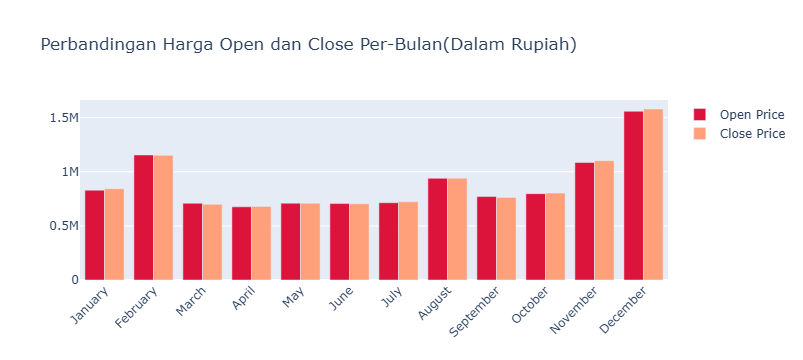

In [133]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Perbandingan Harga Open dan Close Per-Bulan(Dalam Rupiah)')
fig.show()

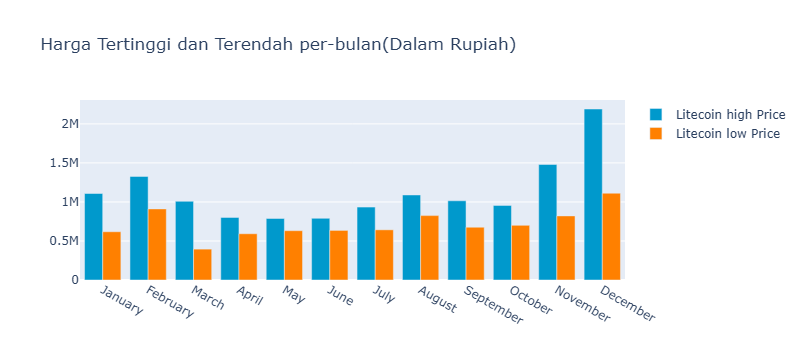

In [134]:
y_2020.groupby(y_2020['Start'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Start'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Start'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Litecoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Litecoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Harga Tertinggi dan Terendah per-bulan(Dalam Rupiah)')
fig.show()

C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



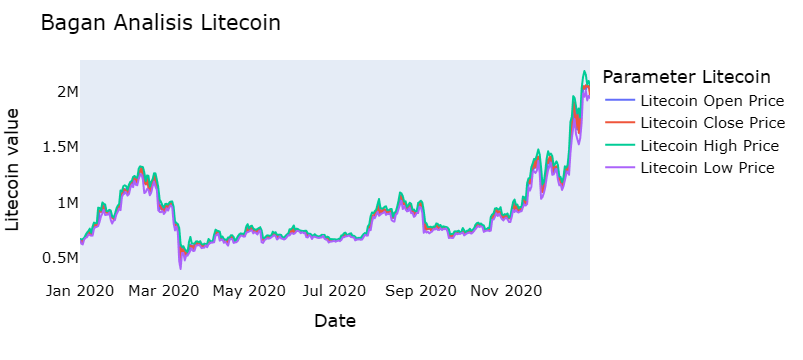

In [135]:
names = cycle(['Litecoin Open Price','Litecoin Close Price','Litecoin High Price','Litecoin Low Price'])

fig = px.line(y_2020, x=y_2020.Start, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Start': 'Date','value':'Litecoin value'})
fig.update_layout(title_text='Bagan Analisis Litecoin', font_size=15, font_color='black',legend_title_text='Parameter Litecoin')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#### Analisis Data Tahun 2021

In [136]:
maindf['Start'] = pd.to_datetime(maindf['Start'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Start'] >= '2021-01-01')
                     & (maindf['Start'] < '2022-01-01')]

y_2021.drop(y_2021[['Volume','Market Cap']],axis=1)

,Start,End,Open,High,Low,Close
820,2021-12-31,2022-01-01,2.350683e+06,2.414497e+06,2.288178e+06,2.323996e+06
821,2021-12-30,2021-12-31,2.307336e+06,2.375422e+06,2.278967e+06,2.351040e+06
822,2021-12-29,2021-12-30,2.314158e+06,2.385081e+06,2.301477e+06,2.306511e+06
823,2021-12-28,2021-12-29,2.476017e+06,2.476017e+06,2.306464e+06,2.320429e+06
824,2021-12-27,2021-12-28,2.477211e+06,2.550734e+06,2.460836e+06,2.475913e+06
...,...,...,...,...,...,...
1180,2021-01-05,2021-01-06,2.460573e+06,2.569412e+06,2.335803e+06,2.516898e+06
1181,2021-01-04,2021-01-05,2.543377e+06,2.740404e+06,2.303838e+06,2.451748e+06
1182,2021-01-03,2021-01-04,2.156810e+06,2.593046e+06,2.149652e+06,2.543757e+06
1183,2021-01-02,2021-01-03,2.003849e+06,2.221669e+06,1.958896e+06,2.156447e+06


In [137]:
monthvise= y_2021.groupby(y_2021['Start'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Start,,
January,2.312016e+06,2.317386e+06
February,2.928659e+06,2.948603e+06
March,3.052835e+06,3.071007e+06
April,3.885416e+06,3.924340e+06
May,4.212301e+06,4.174327e+06
June,2.518452e+06,2.494308e+06
July,2.079111e+06,2.079435e+06
August,2.641561e+06,2.655980e+06
September,2.788472e+06,2.777297e+06


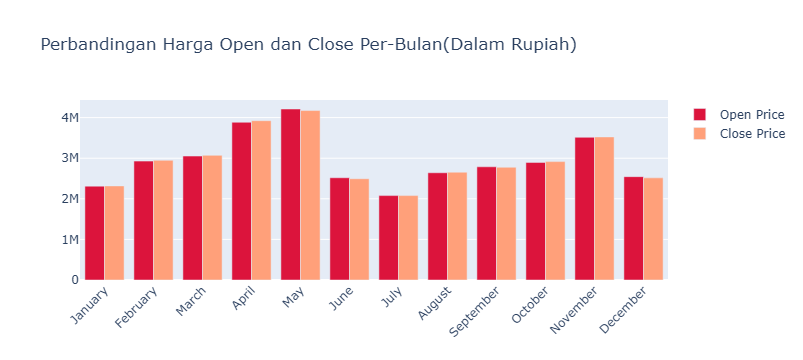

In [138]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Perbandingan Harga Open dan Close Per-Bulan(Dalam Rupiah)')
fig.show()

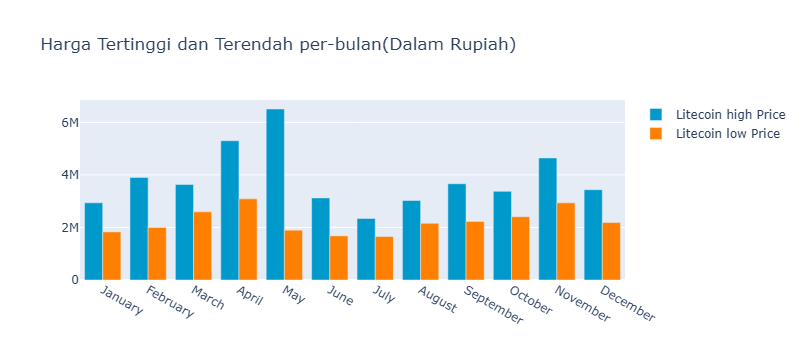

In [139]:
y_2021.groupby(y_2021['Start'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(maindf['Start'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Start'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Litecoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Litecoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Harga Tertinggi dan Terendah per-bulan(Dalam Rupiah)')
fig.show()

C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



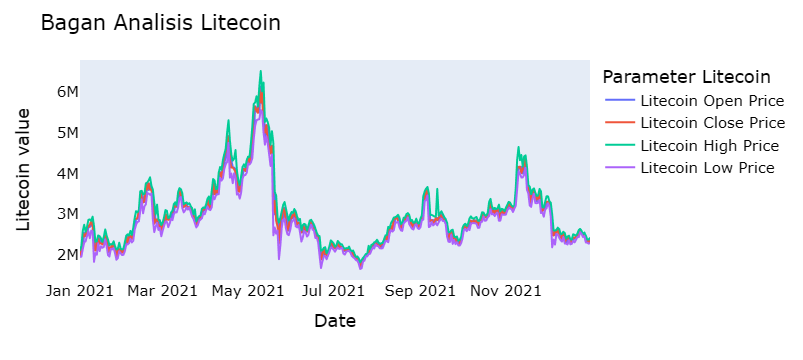

In [140]:
names = cycle(['Litecoin Open Price','Litecoin Close Price','Litecoin High Price','Litecoin Low Price'])

fig = px.line(y_2021, x=y_2021.Start, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Start': 'Date','value':'Litecoin value'})
fig.update_layout(title_text='Bagan Analisis Litecoin', font_size=15, font_color='black',legend_title_text='Parameter Litecoin')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#### Analisis Data Tahun 2022

In [141]:
maindf['Start'] = pd.to_datetime(maindf['Start'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Start'] >= '2022-01-01')
                     & (maindf['Start'] < '2023-01-01')]

y_2022.drop(y_2022[['Volume','Market Cap']],axis=1)

,Start,End,Open,High,Low,Close
455,2022-12-31,2023-01-01,1.076872e+06,1.120744e+06,1.072990e+06,1.108129e+06
456,2022-12-30,2022-12-31,1.056810e+06,1.083279e+06,1.050453e+06,1.076516e+06
457,2022-12-29,2022-12-30,1.050862e+06,1.064058e+06,1.041935e+06,1.057340e+06
458,2022-12-28,2022-12-29,1.088903e+06,1.098651e+06,1.045714e+06,1.050886e+06
459,2022-12-27,2022-12-28,1.121900e+06,1.124497e+06,1.075635e+06,1.089330e+06
...,...,...,...,...,...,...
815,2022-01-05,2022-01-06,2.326059e+06,2.373996e+06,2.075028e+06,2.158255e+06
816,2022-01-04,2022-01-05,2.354374e+06,2.400363e+06,2.319439e+06,2.326132e+06
817,2022-01-03,2022-01-04,2.398807e+06,2.398807e+06,2.321246e+06,2.354133e+06
818,2022-01-02,2022-01-03,2.391748e+06,2.423622e+06,2.354702e+06,2.399541e+06


In [142]:
monthvise= y_2022.groupby(y_2022['Start'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Start,,
January,2.065528e+06,2.046708e+06
February,1.881275e+06,1.884234e+06
March,1.794260e+06,1.799077e+06
April,1.763095e+06,1.749913e+06
May,1.224035e+06,1.211349e+06
June,8.843939e+05,8.766379e+05
July,8.601168e+05,8.635501e+05
August,9.276344e+05,9.246120e+05
September,8.940982e+05,8.936497e+05


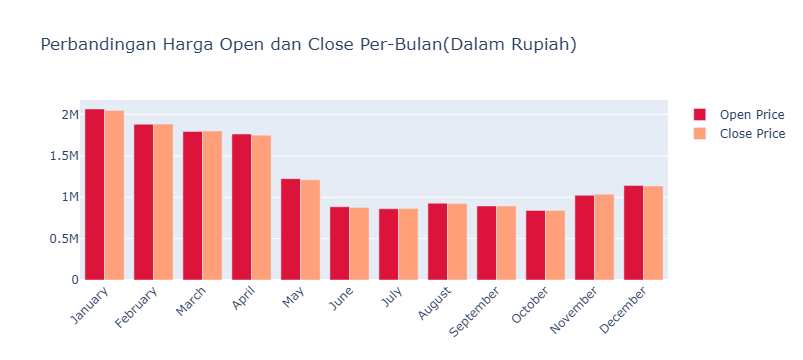

In [143]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Perbandingan Harga Open dan Close Per-Bulan(Dalam Rupiah)')
fig.show()

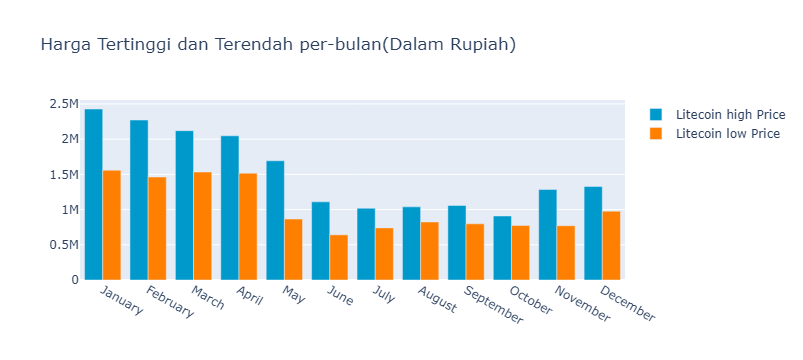

In [144]:
y_2022.groupby(y_2022['Start'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Start'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Start'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Litecoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Litecoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Harga Tertinggi dan Terendah per-bulan(Dalam Rupiah)')
fig.show()

C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



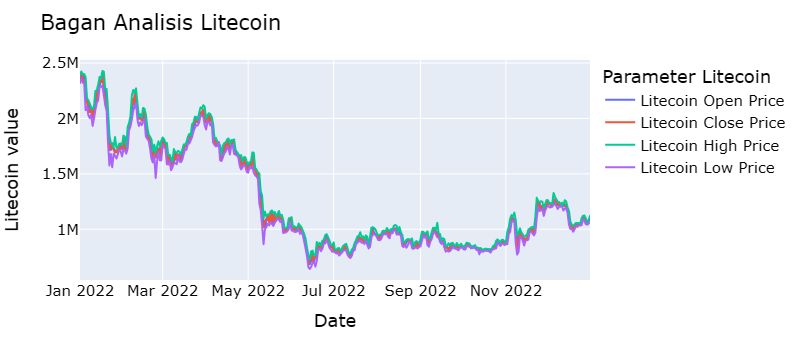

In [145]:
names = cycle(['Litecoin Open Price','Litecoin Close Price','Litecoin High Price','Litecoin Low Price'])

fig = px.line(y_2022, x=y_2022.Start, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Start': 'Date','value':'Litecoin value'})
fig.update_layout(title_text='Bagan Analisis Litecoin', font_size=15, font_color='black',legend_title_text='Parameter Litecoin')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

#### Analisis Data Tahun 2023

In [146]:
maindf['Start'] = pd.to_datetime(maindf['Start'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Start'] >= '2023-01-01')
                     & (maindf['Start'] < '2024-01-01')]

y_2023.drop(y_2023[['Volume','Market Cap']],axis=1)

,Start,End,Open,High,Low,Close
90,2023-12-31,2024-01-01,1.160360e+06,1.175126e+06,1.147921e+06,1.153463e+06
91,2023-12-30,2023-12-31,1.159303e+06,1.172178e+06,1.149818e+06,1.161668e+06
92,2023-12-29,2023-12-30,1.216315e+06,1.229795e+06,1.159669e+06,1.160307e+06
93,2023-12-28,2023-12-29,1.201516e+06,1.227791e+06,1.184595e+06,1.215434e+06
94,2023-12-27,2023-12-28,1.159489e+06,1.220112e+06,1.147379e+06,1.200643e+06
...,...,...,...,...,...,...
450,2023-01-05,2023-01-06,1.195567e+06,1.207589e+06,1.169243e+06,1.175161e+06
451,2023-01-04,2023-01-05,1.197378e+06,1.231765e+06,1.180397e+06,1.196269e+06
452,2023-01-03,2023-01-04,1.185349e+06,1.206938e+06,1.172329e+06,1.198900e+06
453,2023-01-02,2023-01-03,1.123172e+06,1.201553e+06,1.112527e+06,1.185153e+06


In [147]:
monthvise= y_2023.groupby(y_2023['Start'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Start,,
January,1.324133e+06,1.336196e+06
February,1.525005e+06,1.524793e+06
March,1.360062e+06,1.357550e+06
April,1.460332e+06,1.459808e+06
May,1.385949e+06,1.387004e+06
June,1.346038e+06,1.355013e+06
July,1.530385e+06,1.522621e+06
August,1.202630e+06,1.186958e+06
September,1.012275e+06,1.013030e+06


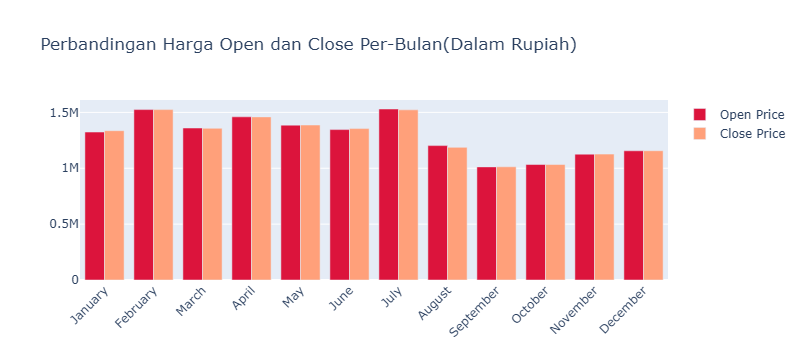

In [148]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Perbandingan Harga Open dan Close Per-Bulan(Dalam Rupiah)')
fig.show()

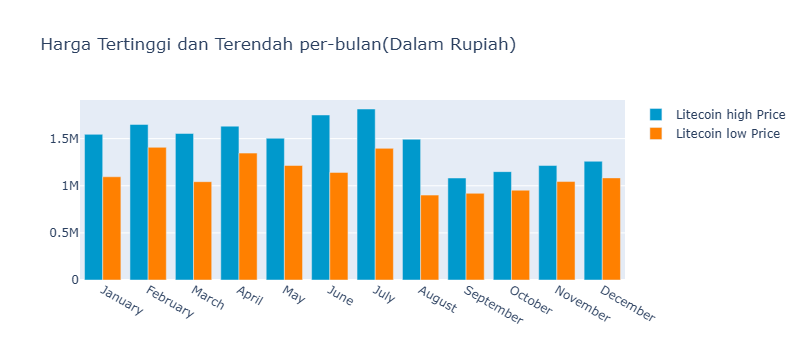

In [149]:
y_2023.groupby(y_2023['Start'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(maindf['Start'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Start'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Litecoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Litecoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Harga Tertinggi dan Terendah per-bulan(Dalam Rupiah)')
fig.show()

C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



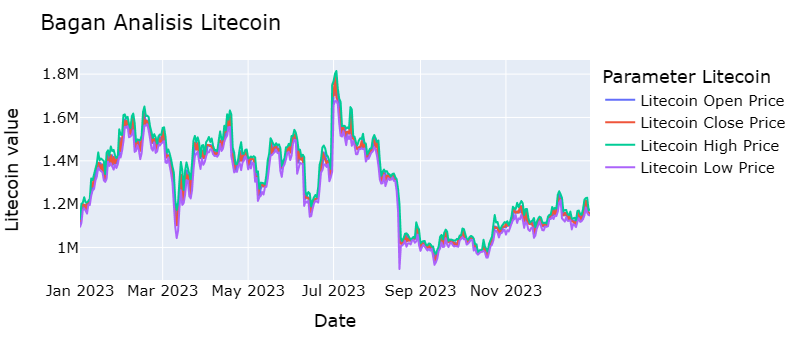

In [150]:
names = cycle(['Litecoin Open Price','Litecoin Close Price','Litecoin High Price','Litecoin Low Price'])

fig = px.line(y_2023, x=y_2023.Start, y=[y_2023['Open'], y_2023['Close'], 
                                          y_2023['High'], y_2023['Low']],
             labels={'Start': 'Date','value':'Litecoin value'})
fig.update_layout(title_text='Bagan Analisis Litecoin', font_size=15, font_color='black',legend_title_text='Parameter Litecoin')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

#### Analisis Data Tahun 2024

In [151]:
maindf['Start'] = pd.to_datetime(maindf['Start'], format='%Y-%m-%d')

y_2024 = maindf.loc[(maindf['Start'] >= '2024-01-01')
                     & (maindf['Start'] < '2024-04-01')]

y_2024.drop(y_2024[['Volume','Market Cap']],axis=1)

,Start,End,Open,High,Low,Close
0,2024-03-30,2024-03-31,1.713925e+06,1.713925e+06,1.606076e+06,1.628949e+06
1,2024-03-29,2024-03-30,1.490574e+06,1.735644e+06,1.478186e+06,1.728329e+06
2,2024-03-28,2024-03-29,1.485008e+06,1.525646e+06,1.482577e+06,1.492550e+06
3,2024-03-27,2024-03-28,1.518514e+06,1.547500e+06,1.478538e+06,1.483023e+06
4,2024-03-26,2024-03-27,1.431998e+06,1.530540e+06,1.392202e+06,1.517368e+06
...,...,...,...,...,...,...
85,2024-01-05,2024-01-06,1.053106e+06,1.058066e+06,1.024786e+06,1.045778e+06
86,2024-01-04,2024-01-05,1.033247e+06,1.060631e+06,1.025784e+06,1.054340e+06
87,2024-01-03,2024-01-04,1.158574e+06,1.166616e+06,9.945650e+05,1.034201e+06
88,2024-01-02,2024-01-03,1.183150e+06,1.199134e+06,1.152400e+06,1.157441e+06


In [152]:
monthvise= y_2024.groupby(y_2024['Start'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Start,,
January,1.091655e+06,1.087691e+06
February,1.108283e+06,1.115498e+06
March,1.420805e+06,1.433996e+06
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


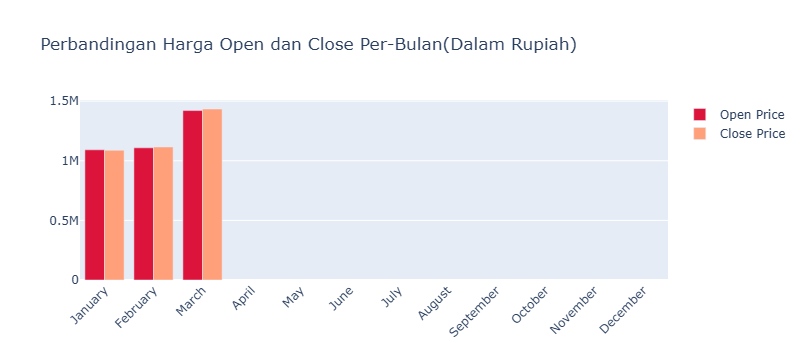

In [153]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Perbandingan Harga Open dan Close Per-Bulan(Dalam Rupiah)')
fig.show()

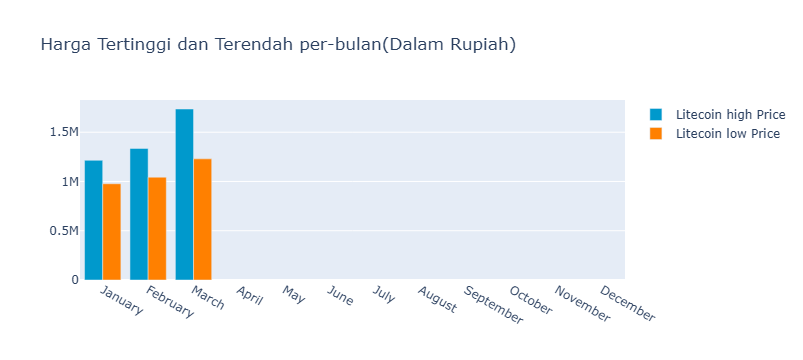

In [154]:
y_2024.groupby(y_2024['Start'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2024.groupby(maindf['Start'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2024.groupby(y_2024['Start'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Litecoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Litecoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Harga Tertinggi dan Terendah per-bulan(Dalam Rupiah)')
fig.show()

C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



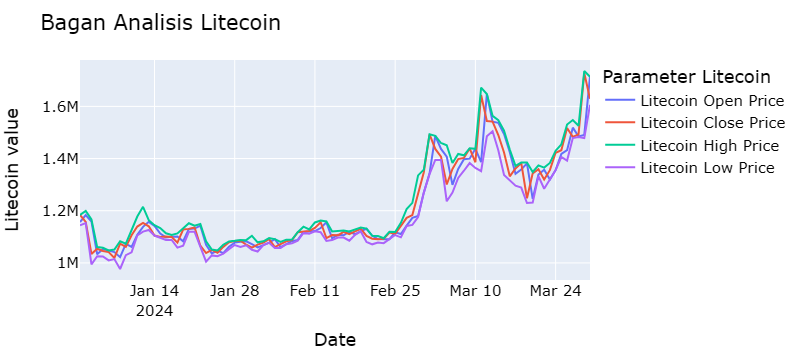

In [155]:
names = cycle(['Litecoin Open Price','Litecoin Close Price','Litecoin High Price','Litecoin Low Price'])

fig = px.line(y_2024, x=y_2024.Start, y=[y_2024['Open'], y_2024['Close'], 
                                          y_2024['High'], y_2024['Low']],
             labels={'Start': 'Date','value':'Litecoin value'})
fig.update_layout(title_text='Bagan Analisis Litecoin', font_size=15, font_color='black',legend_title_text='Parameter Litecoin')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

### Analisis Keseluruhan dari 2020-2024

In [156]:
maindf['Start'] = pd.to_datetime(maindf['Start'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Start'] >= '2020-01-01')
                     & (maindf['Start'] <= '2024-04-01')]

y_overall.drop(y_overall[['Volume','Market Cap']],axis=1)

,Start,End,Open,High,Low,Close
0,2024-03-30,2024-03-31,1.713925e+06,1.713925e+06,1.606076e+06,1.628949e+06
1,2024-03-29,2024-03-30,1.490574e+06,1.735644e+06,1.478186e+06,1.728329e+06
2,2024-03-28,2024-03-29,1.485008e+06,1.525646e+06,1.482577e+06,1.492550e+06
3,2024-03-27,2024-03-28,1.518514e+06,1.547500e+06,1.478538e+06,1.483023e+06
4,2024-03-26,2024-03-27,1.431998e+06,1.530540e+06,1.392202e+06,1.517368e+06
...,...,...,...,...,...,...
1546,2020-01-05,2020-01-06,6.788913e+05,7.043503e+05,6.774315e+05,6.854973e+05
1547,2020-01-04,2020-01-05,6.668852e+05,6.792606e+05,6.630745e+05,6.789326e+05
1548,2020-01-03,2020-01-04,6.266588e+05,6.676992e+05,6.182952e+05,6.662164e+05
1549,2020-01-02,2020-01-03,6.615689e+05,6.637873e+05,6.252329e+05,6.260001e+05


In [157]:
monthvise= y_overall.groupby(y_overall['Start'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Start,,
January,1.524651e+06,1.526296e+06
February,1.711495e+06,1.716669e+06
March,1.669043e+06,1.673673e+06
April,1.946270e+06,1.953503e+06
May,1.882976e+06,1.870533e+06
June,1.363788e+06,1.357458e+06
July,1.295980e+06,1.297121e+06
August,1.427695e+06,1.426958e+06
September,1.366365e+06,1.361603e+06


C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



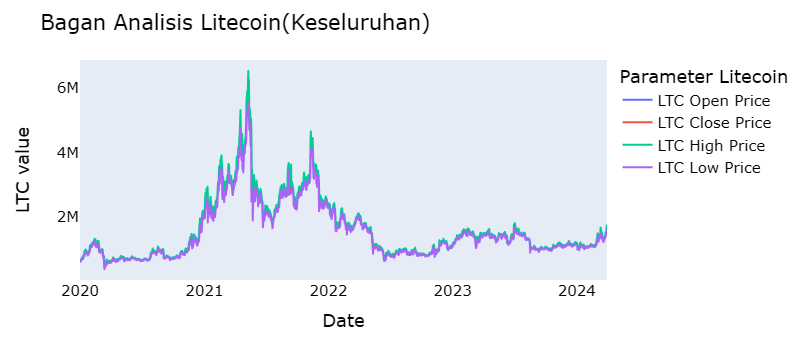

In [158]:
names = cycle(['LTC Open Price','LTC Close Price','LTC High Price','LTC Low Price'])

fig = px.line(y_overall, x=y_overall.Start, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Start': 'Date','value':'LTC value'})
fig.update_layout(title_text='Bagan Analisis Litecoin(Keseluruhan)', font_size=15, font_color='black',legend_title_text='Parameter Litecoin')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# 4.Proses Membuat Algoritma LSTM

In [184]:
# Pertama, Mengambil data Close Price(Harga petutupan)
closedf = maindf[['Start','Close']]
print("Shape of close dataframe:", closedf.shape)


Shape of close dataframe: (1551, 2)


C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



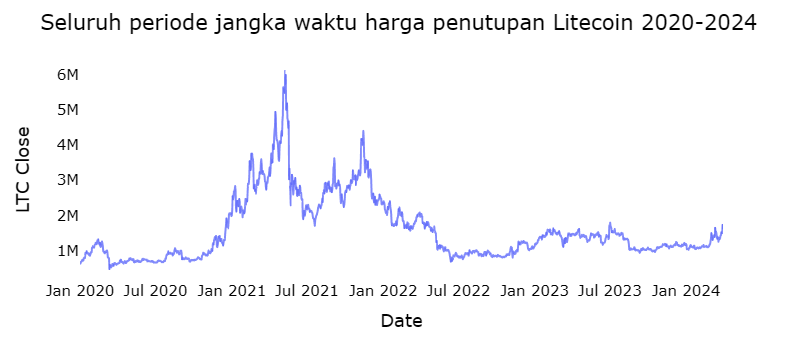

In [186]:
fig = px.line(closedf, x=closedf.Start, y=closedf.Close,labels={'Start':'Date','Close':'LTC Close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Seluruh periode jangka waktu harga penutupan Litecoin 2020-2024', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Pengambilan Data Selama 2 Tahun

In [187]:
closedf = closedf[closedf['Start'] > '2022-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  819


In [188]:
closedf

,Start,Close
0,2024-03-30,1.628949e+06
1,2024-03-29,1.728329e+06
2,2024-03-28,1.492550e+06
3,2024-03-27,1.483023e+06
4,2024-03-26,1.517368e+06
...,...,...
814,2022-01-06,2.161743e+06
815,2022-01-05,2.158255e+06
816,2022-01-04,2.326132e+06
817,2022-01-03,2.354133e+06


C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



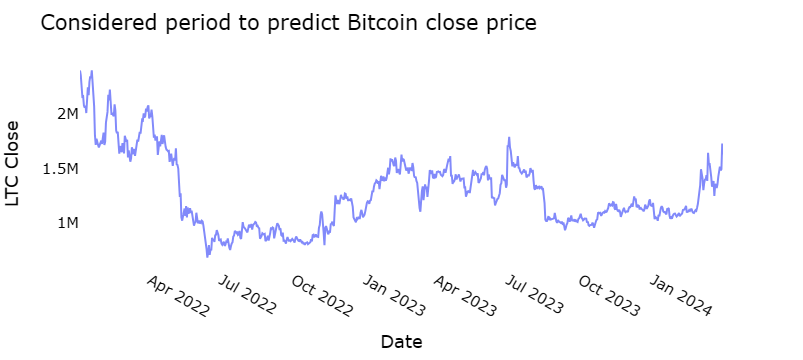

In [189]:
fig = px.line(closedf, x=closedf.Start, y=closedf.Close,labels={'Start':'Date','Close':'LTC Close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Normalisasi Data

In [190]:
# menghapus kolom tanggal(Start) dan normalisasi menggunakan MinMax Scaler
del closedf['Start']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(819, 1)


### Membagi data kedalam data testing dan data latih

In [191]:
# Data latih sebanyak 65% dan Data testing sebanyak 35%
training_size=int(len(closedf)*0.7)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (573, 1)
test_data:  (246, 1)


### Sekarang kita Transformasikan harga Penutupan berdasarkan persyaratan perkiraan analisis rangkaian waktu, Di sini kita akan mengambil 10

In [192]:
# konversikan array nilai menjadi matriks kumpulan data
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [196]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (562, 10)
y_train:  (562,)
X_test:  (235, 10)
y_test (235,)


In [197]:
# membentuk ulang input menjadi [samples, time steps, features] yang diperlukan untuk LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (562, 10, 1)
X_test:  (235, 10, 1)


### Membangun Model LSTM

In [198]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\Jafar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [201]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4856e-04 - val_loss: 0.0032
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7139e-04 - val_loss: 0.0031
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1532e-04 - val_loss: 0.0030
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5726e-04 - val_loss: 0.0032
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5387e-04 - val_loss: 0.0030
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9533e-04 - val_loss: 0.0031
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8285e-04 - val_loss: 0.0030
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7057e-04 - val_loss: 0.0032
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0004e-04 - val_loss: 0.0031
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3946e-04 - val_loss: 0.0032
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2102e-04 - val_loss: 0.0031
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 

### Proses Plotting Loss dan Validasi Loss

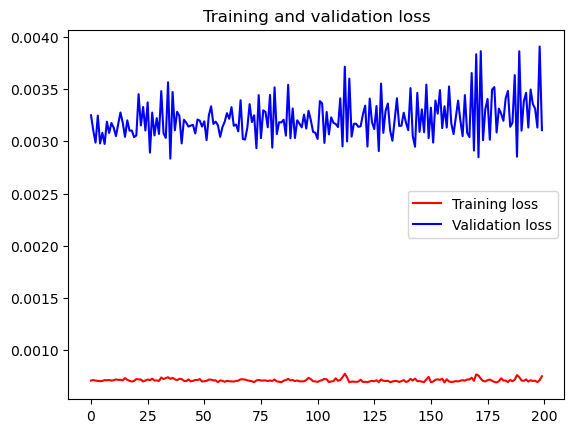

<Figure size 640x480 with 0 Axes>

In [202]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

#### Mari Lakukan prediksi dan periksa Performence metrics

In [172]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


((492, 1), (201, 1))

### Model Evaluasi

In [173]:
# Ubah kembali ke bentuk Original
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluasi Matriks RMSE, MSE, dan MAE

In [174]:
# Evaluasi matriks RMSE, MSE, dan MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  49714.18450178279
Train data MSE:  2471500140.6773
Train data MAE:  33950.68804502637
-------------------------------------------------------------------------------------
Test data RMSE:  59730.42574571792
Test data MSE:  3567723759.764722
Test data MAE:  43704.26918728715


### Skor Regresi Varians

In [175]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9316793804845617
Test data explained variance regression score: 0.9676243575311486


### Skor R-Square untuk Regresi

In [176]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9316287043265113
Test data R2 score: 0.9675530862138173


### Regression Loss Mean Gamma deviance regression loss (MGD) dan Mean Poisson deviance regression loss (MPD)

In [177]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0015329893371085993
Test data MGD:  0.0029467356646894496
----------------------------------------------------------------------
Train data MPD:  1921.0734832530545
Test data MPD:  3115.291177426298


## Perbandingan harga penutupan Litecoin asli dengan prediksi harga penutupan

Train predicted data:  (731, 1)
Test predicted data:  (731, 1)


C:\Users\Jafar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



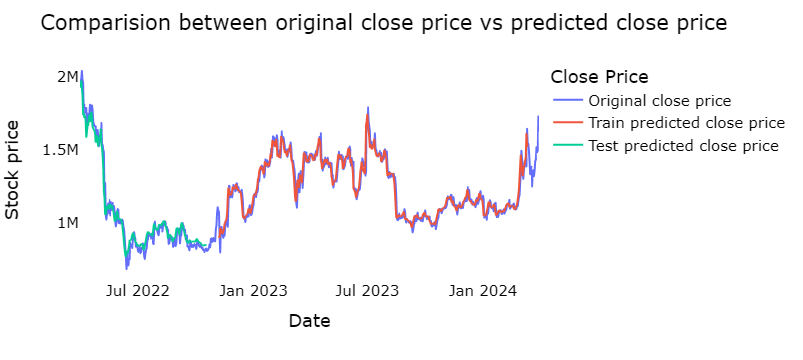

In [179]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Start': close_stock['Start'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Start'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Start': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()